# Lab3

## Task 1 Fully connected feed-forward network

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df_laptops = pd.read_csv("laptops.csv")

In [3]:
df_laptops.head()

,name,price_eur,display_inch,display_cm,display_resolution,display_ratio,weight_kg,height_mm,width_mm,depth_mm,...,keyboard_backlit,keyboard_numpad,has_webcam,has_bluetooth,bluetooth_version,wifi_standard,product_ean,product_sku,release_year,category
0,"Apple MacBook Air M1 256GB, Space grau",912.99,13.0,33.8,2560x1600,16:9,1.29,16.1,304.1,212.4,...,True,False,True,True,5.0,Wi-Fi 6 (802.11ax),1.942521e+11,MGN63D/A,2020.0,Notebooks
1,MSI Stealth 17 Studio A13VI-013 - Intel Core i...,4680.23,17.3,43.9,3840x2160,16:9,2.80,20.1,397.6,283.5,...,True,True,True,True,5.3,Wi-Fi 6E (802.11ax),4.711377e+12,0017P2-013,NaN,Notebooks
2,MSI Summit E14 FlipEvo A12MT-049 i7-1260P/16GB...,1651.12,14.0,35.6,2880x1800,NaN,1.60,17.9,314.0,227.5,...,True,False,True,True,5.2,Wi-Fi 6E (802.11ax),4.719073e+12,0014F1-049,NaN,Notebooks
3,Gigabyte GBT AORUS 15 9KF-E3DE383SH i5 W11 144Hz,1087.38,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,NaN,NaN,4.719332e+12,AORUS 15 9KF-E3DE383SH,NaN,Notebooks
4,Fujitsu Lifebook A3511 FHD i3-1115G4 8GB 256GB...,354.97,15.6,39.6,1920x1080,NaN,1.95,23.9,361.0,244.0,...,False,True,True,True,5.1,Wi-Fi 6E (802.11ax),4.065221e+12,FPC04902BS,NaN,Notebooks


In [4]:
df_laptops.keys()

Index(['name', 'price_eur', 'display_inch', 'display_cm', 'display_resolution',
       'display_ratio', 'weight_kg', 'height_mm', 'width_mm', 'depth_mm',
       'operating_system', 'cpu_processor', 'ram_memory', 'gpu_integrated',
       'gpu_extra', 'internal_storage_gb', 'storage_type', 'battery_life_h',
       'battery_capacity_wh', 'psu_watts', 'audio_system', 'speakers_count',
       'has_touchscreen', 'keyboard_backlit', 'keyboard_numpad', 'has_webcam',
       'has_bluetooth', 'bluetooth_version', 'wifi_standard', 'product_ean',
       'product_sku', 'release_year', 'category'],
      dtype='object')

In [5]:
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 764 non-null    object 
 1   price_eur            764 non-null    float64
 2   display_inch         763 non-null    float64
 3   display_cm           628 non-null    float64
 4   display_resolution   628 non-null    object 
 5   display_ratio        454 non-null    object 
 6   weight_kg            616 non-null    float64
 7   height_mm            627 non-null    float64
 8   width_mm             627 non-null    float64
 9   depth_mm             627 non-null    float64
 10  operating_system     626 non-null    object 
 11  cpu_processor        628 non-null    object 
 12  ram_memory           627 non-null    float64
 13  gpu_integrated       617 non-null    object 
 14  gpu_extra            131 non-null    object 
 15  internal_storage_gb  618 non-null    flo

In [6]:
df_laptops = df_laptops.drop(columns=['release_year', 'battery_life_h', 'audio_system', 'has_bluetooth']) #also possible to write list with axis=1 (columns)

In [7]:
df_laptops['display_ratio'].fillna('16:10', inplace=True)

In [8]:
df_laptops['gpu_extra'].fillna('No extra GPU', inplace=True)

In [9]:
df_laptops = df_laptops.dropna()

In [10]:
def update_category(row):
    if row['weight_kg'] < 1.7:
        return 'Ultrabook'
    else:
        return row['category']
        
df_laptops_copy = df_laptops.copy()
df_laptops_copy['category'] = df_laptops.apply(update_category, axis=1)

In [11]:
df_laptops_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 0 to 759
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 377 non-null    object 
 1   price_eur            377 non-null    float64
 2   display_inch         377 non-null    float64
 3   display_cm           377 non-null    float64
 4   display_resolution   377 non-null    object 
 5   display_ratio        377 non-null    object 
 6   weight_kg            377 non-null    float64
 7   height_mm            377 non-null    float64
 8   width_mm             377 non-null    float64
 9   depth_mm             377 non-null    float64
 10  operating_system     377 non-null    object 
 11  cpu_processor        377 non-null    object 
 12  ram_memory           377 non-null    float64
 13  gpu_integrated       377 non-null    object 
 14  gpu_extra            377 non-null    object 
 15  internal_storage_gb  377 non-null    float64


In [12]:
def convert_category_columns_to_numerical(df):
    label_encoder = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object' and column not in ['name', 'product_sku', 'display_resolution']:
            df[column] = label_encoder.fit_transform(df[column])
    return df

In [24]:
convert_category_columns_to_numerical(df_laptops_copy)
X = df_laptops_1.drop(columns=['name', 'product_sku', 'display_resolution'])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_laptops_1['display_resolution'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax')) 

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
7/7 [==============================] - 2s 77ms/step - loss: 1.2435 - accuracy: 0.4796 - val_loss: 1.1373 - val_accuracy: 0.4898
Epoch 2/10
7/7 [==============================] - 0s 19ms/step - loss: 0.9436 - accuracy: 0.7296 - val_loss: 1.0165 - val_accuracy: 0.5714
Epoch 3/10
7/7 [==============================] - 0s 18ms/step - loss: 0.7844 - accuracy: 0.7653 - val_loss: 0.9289 - val_accuracy: 0.5714
Epoch 4/10
7/7 [==============================] - 0s 17ms/step - loss: 0.6776 - accuracy: 0.8010 - val_loss: 0.8732 - val_accuracy: 0.5918
Epoch 5/10
7/7 [==============================] - 0s 15ms/step - loss: 0.5991 - accuracy: 0.8010 - val_loss: 0.8263 - val_accuracy: 0.5918
Epoch 6/10
7/7 [==============================] - 0s 38ms/step - loss: 0.5393 - accuracy: 0.8469 - val_loss: 0.7775 - val_accuracy: 0.6327
Epoch 7/10
7/7 [==============================] - 0s 18ms/step - loss: 0.4887 - accuracy: 0.8469 - val_loss: 0.7471 - val_accuracy: 0.6939
Epoch 8/10
7/7 [===========

## Task 2 Convolutional neural networks

In [37]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [5]:
train_df = pd.read_csv("ground_truth.csv")

In [9]:
filenames = train_df['filename'].values
labels = train_df[['tom', 'jerry']].values

In [11]:
filenames

array(['frame0.jpg', 'frame1.jpg', 'frame2.jpg', ..., 'frame5475.jpg',
       'frame5476.jpg', 'frame5477.jpg'], dtype=object)

In [12]:
labels

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [21]:
images = []

In [22]:
for filename in filenames:
    img_path = './images/' + filename  # Adjust the path accordingly
    img = image.load_img(img_path, target_size=(48, 85))  # Adjust target_size if needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to be between 0 and 1
    images.append(img_array)

In [23]:
images = np.array(images)

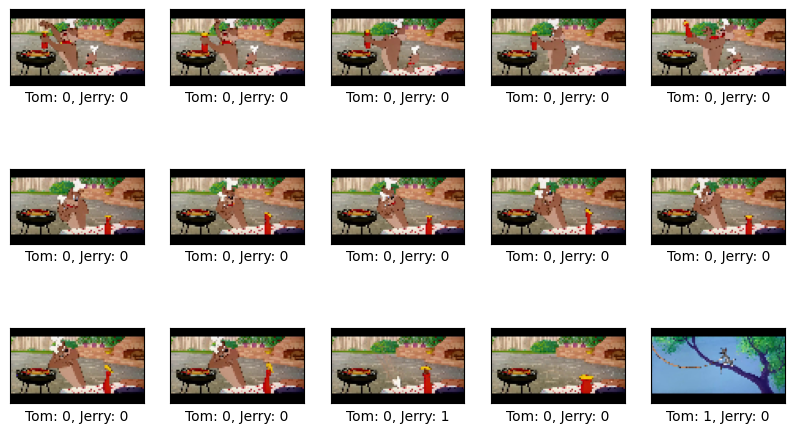

In [24]:
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(f'Tom: {labels[i][0]}, Jerry: {labels[i][1]}')

plt.show()

In [42]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.20)
train_labels_numerical = np.argmax(train_labels, axis=1)
test_labels_numerical = np.argmax(test_labels, axis=1)

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 85, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 83, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 41, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 39, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 19, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 17, 64)         36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [33]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 83, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 41, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 39, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 19, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 17, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 8704)              0

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_numerical, epochs=10, 
                    validation_data=(test_images, test_labels_numerical))

Epoch 1/10
137/137 [==============================] - 14s 91ms/step - loss: 0.5309 - accuracy: 0.7693 - val_loss: 0.5039 - val_accuracy: 0.7701
Epoch 2/10
137/137 [==============================] - 12s 90ms/step - loss: 0.4603 - accuracy: 0.7921 - val_loss: 0.4147 - val_accuracy: 0.7911
Epoch 3/10
137/137 [==============================] - 13s 93ms/step - loss: 0.3836 - accuracy: 0.8236 - val_loss: 0.3610 - val_accuracy: 0.8376
Epoch 4/10
137/137 [==============================] - 12s 91ms/step - loss: 0.3207 - accuracy: 0.8571 - val_loss: 0.3140 - val_accuracy: 0.8622
Epoch 5/10
137/137 [==============================] - 13s 93ms/step - loss: 0.2654 - accuracy: 0.8873 - val_loss: 0.3433 - val_accuracy: 0.8467
Epoch 6/10
137/137 [==============================] - 13s 95ms/step - loss: 0.2164 - accuracy: 0.9076 - val_loss: 0.2800 - val_accuracy: 0.8759
Epoch 7/10
137/137 [==============================] - 14s 105ms/step - loss: 0.1797 - accuracy: 0.9261 - val_loss: 0.2683 - val_accuracy

35/35 - 1s - loss: 0.3193 - accuracy: 0.9024 - 835ms/epoch - 24ms/step


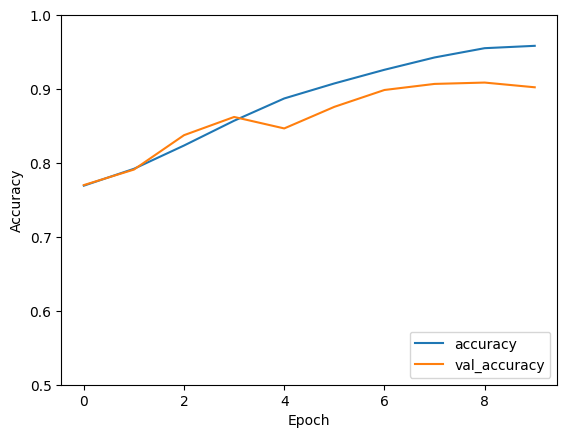

In [47]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels_numerical, verbose=2)

In [48]:
print(test_acc)

0.9023722410202026


## Task 3 Recurrent neural networks

In [49]:
df_news = pd.read_csv("google_news.csv")

In [50]:
df_news.columns

Index(['Title', 'Publisher', 'DateTime', 'Link', 'Category'], dtype='object')

In [51]:
df_news = df_news.drop(columns=['Publisher', 'DateTime', 'Link']) #also possible to write list with axis=1 (columns)

In [52]:
df_news.head()

,Title,Category
0,"Chainlink (LINK) Falters, Hedera (HBAR) Wobble...",Business
1,Funds punished for owning too few Nvidia share...,Business
2,Crude oil prices stalled as hedge funds sold: ...,Business
3,Grayscale's Bitcoin Win Is Still Only Half the...,Business
4,"I'm a Home Shopping Editor, and These Are the ...",Business


In [65]:
X = df_news['Title']
y = df_news['Category']

In [93]:
from collections import Counter
Counter( df_news['Category'])

Counter({'Business': 6800,
         'Entertainment': 7003,
         'Headlines': 7155,
         'Health': 4877,
         'Science': 4361,
         'Sports': 7709,
         'Technology': 6822,
         'Worldwide': 6575})

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le = LabelEncoder()
y = le.fit_transform(y)

In [98]:
y

array([0, 0, 0, ..., 7, 7, 7])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=100000)

In [102]:
tokenizer.fit_on_texts(X_train)

In [103]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [104]:
vocab_size = len(tokenizer.word_index) + 1

In [105]:
max_len = 20
X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_len)

In [106]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=8)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=8)

In [108]:
embedding_dim = 50

model = models.Sequential()
model.add(layers.Embedding(input_dim=100000, output_dim=embedding_dim, input_length=max_len))
model.add(layers.LSTM(units=100))
model.add(layers.Dense(units=8, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test_one_hot)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
1026/1026 [==============================] - 88s 84ms/step - loss: 0.2384 - accuracy: 0.5477 - val_loss: 0.1266 - val_accuracy: 0.8070
Epoch 2/10
1026/1026 [==============================] - 89s 87ms/step - loss: 0.0809 - accuracy: 0.8837 - val_loss: 0.0993 - val_accuracy: 0.8535
Epoch 3/10
1026/1026 [==============================] - 90s 88ms/step - loss: 0.0474 - accuracy: 0.9351 - val_loss: 0.1075 - val_accuracy: 0.8447
Epoch 4/10
1026/1026 [==============================] - 96s 94ms/step - loss: 0.0346 - accuracy: 0.9511 - val_loss: 0.1176 - val_accuracy: 0.8403
Epoch 5/10
1026/1026 [==============================] - 92s 89ms/step - loss: 0.0269 - accuracy: 0.9582 - val_loss: 0.1249 - val_accuracy: 0.8422
Epoch 6/10
1026/1026 [==============================] - 92s 89ms/step - loss: 0.0232 - accuracy: 0.9610 - val_loss: 0.1306 - val_accuracy: 0.8392
Epoch 7/10
1026/1026 [==============================] - 82s 80ms/step - loss: 0.0196 - accuracy: 0.9642 - val_loss: 0.1455 -

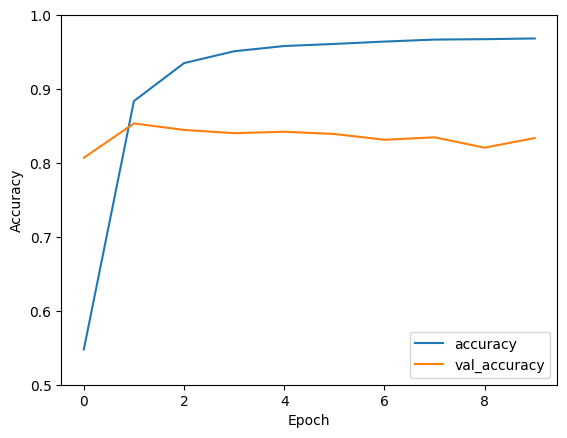

In [109]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')